In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import mnist, boston_housing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score

In [3]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 133kB 15.8MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219242 sha256=a85ad773408bc31ba9c8127e6e51fd04962937f3ef2f697f4c6e5aae01c65264
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [4]:
with open('/content/drive/MyDrive/Projects/Melee predicter/final_processed_data.pkl', "rb") as fh:
  df = pickle.load(fh)

In [5]:
features = list(df.columns[4:])
features.remove('winner')


In [6]:
df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train[features]
y_train = df_train['winner']

X_test = df_test[features]
y_test = df_test['winner']

In [7]:
ss = StandardScaler()
X_train_scaled=ss.fit_transform(X_train)

In [8]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(86,)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='sigmoid'))
# Output layer: size 1 dense layer
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               26100     
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 146,601
Trainable params: 146,601
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', metrics=['accuracy','AUC'])

In [10]:
history = model.fit(X_train_scaled, y_train.to_numpy(), epochs=50,validation_split=.2, batch_size=2048)

Epoch 1/50
193/193 [==============================] - 4s 9ms/step - loss: 0.5703 - accuracy: 0.6918 - auc: 0.7651 - val_loss: 0.4901 - val_accuracy: 0.7504 - val_auc: 0.8403
Epoch 2/50
193/193 [==============================] - 1s 6ms/step - loss: 0.4873 - accuracy: 0.7520 - auc: 0.8414 - val_loss: 0.4637 - val_accuracy: 0.7651 - val_auc: 0.8588
Epoch 3/50
193/193 [==============================] - 1s 6ms/step - loss: 0.4558 - accuracy: 0.7702 - auc: 0.8627 - val_loss: 0.4363 - val_accuracy: 0.7830 - val_auc: 0.8757
Epoch 4/50
193/193 [==============================] - 1s 6ms/step - loss: 0.4355 - accuracy: 0.7820 - auc: 0.8754 - val_loss: 0.4281 - val_accuracy: 0.7860 - val_auc: 0.8871
Epoch 5/50
193/193 [==============================] - 1s 6ms/step - loss: 0.4146 - accuracy: 0.7935 - auc: 0.8880 - val_loss: 0.4000 - val_accuracy: 0.8021 - val_auc: 0.8970
Epoch 6/50
193/193 [==============================] - 1s 6ms/step - loss: 0.3953 - accuracy: 0.8056 - auc: 0.8991 - val_loss: 0.39

Pretty incredible that a network architecture I basically just played around with randomly for like half an hour can perform as well/better than all the other models I tested

In [15]:
y_pred_prob=model.predict(ss.transform(X_test))[:,0]

In [16]:
log_loss( y_test, y_pred_prob)

0.1667498894721942

In [17]:
accuracy_score(y_test, np.rint(y_pred_prob))

0.919737440696692

In [18]:
roc_auc_score( y_test, y_pred_prob)

0.9829848137952654

In [19]:
with open('/content/drive/MyDrive/Projects/Melee predicter/prob_check1.pkl', "rb") as fh:
  prob_check = pickle.load(fh)

In [20]:
p = model.predict(ss.transform(prob_check[features]))[:,0]

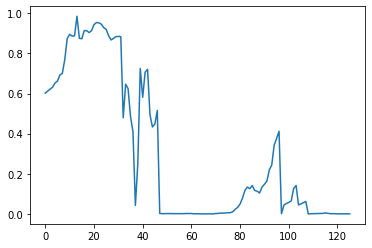

In [21]:
plt.plot(prob_check['frames_elapsed']/60, p)

The model performs well, even better than the tree based methods I've mostly used thus far. The issue is that it achieves this better performance by being swingier and going to 0/1 much faster than the other models, as evidenced by the probability graph shown above. 